# 🦉COSADAMA Introduction to Data Science Study


- 작성자: 박하람 
- 참고자료: 파이썬으로 데이터 주무르기(민형기)
- 교재: 201 - 232쪽 (깃헙 교안으로 공부하면서, 궁금한 부분은 교재를 참고하세요. 혹은 깃헙 교안을 다 보고 교재를 복습 겸 읽어봐도 됩니다!)

## 우리나라 인구 소멸 위기 지역 분석

이번 주차에서는 특이한 우리나라 시각화 지도를 만들어보려고 하는데요! 이 지도를 활용해 **우리나라 인구 소멸 위기 지역 분석**을 해보려 합니다. 이상호 한국고용정보원 연구원이 보고서에서 사용한 인구소멸 지역의 정의를 활용해 우리나라에서 인구 소멸 위기에 있는 지역을 시각화해보려고 합니다. 무척이나 재미있는 작업 같죠?💖 필자가 이 분석에 대한 시각화 방식을 혜식님의 <버거지수>를 시각화 한 것에서 착안했는데요, 이 버거지수도 발생이 무척 재미있더라구요. 중간에 소개해드릴게요😊

이번 프로젝트는 국가통계포털 KOSIS의 인구 데이터를 다운받아 활용해볼 것이구요, pandas를 활용해 데이터를 정리하고 Cartogram으로 우리나라 지도를 만들어볼 것입니다. 이게 혜식님의 코드에서 차용한 것이라 다소 복잡할 수 있는데요, 최대한 이해할 수 있는 부분까지 해보면 좋을 것 같습니다. 이 Cartogram은 Folium과는 달리 명확하게 지역구들의 명칭까지 모두 확인할 수 있다는 것이 큰 장점이에요. 마지막으로는 Folium으로 인구수와 소멸지역까지 시각화해보려고 합니다. 그럼 이번 주차 공부도 시작합니다🐻

### 1. 목표 명확히 하기 

우선 생각해보아야 할 지점이 바로 '어떻게 우리나라 인구 소멸을 측정하지?'에요. 가설을 설정해 이를 설문조사하려고 할 때, 양적으로 측정가능한 지표로 만들어내야 합니다. 이번 프로젝트도 어떻게 우리나라의 인구 소멸 위기를 측정할 것인지 생각하는 것이 중요합니다. 

우리는 이상호 한국고용정보원 연구원의 <한국의 지방소멸에 관한 7가지 분석>이라는 보고서에서 사용한 방법을 사용할 겁니다. 인구 소멸 지역의 정의를 **65세 이상 노인 인구와 20-39세 여성 인구를 비교해서 젊은 여성 인구가 노인 인구의 절반에 미달할 경우 인구 소멸 위험 지역으로 분류**하는 방법입니다. 그렇다면 중요한 건, 우리에게 어떤 데이터가 필요하냐에요. 우선 우리나라의 인구 데이터가 필요할 것인데요, 65세 이상 노인인구가 필요하고, 20-39세 여성 인구가 필요할 것이에요. 그래서 국가통계포털 KOSIS에서 먼저 들어가 필요한 데이터를 직접 찾아보세요! 주어진 데이터로 연습할 것이지만, 먼저 찾아보고 어떤 데이터를 이용해야겠다 찾아보는 것도 중요합니다. 

- [국가 통계 포털](http://kosis.kr/index/index.do)
- 실제 데이터는 드라이브에서 다운 받기 

실제로 찾아보면, 어떤 인구 데이터를 받아야 하는지 감이 오지 않을 거에요. 그만큼 필요한 데이터를 얻는 것은 어려운 작업이기도 하답니다. 둘러보면서 다음에 내가 쓸만한 자료들은 없을지 생각해보는 것도 좋을 것 같습니다. 

### 2. 인구 데이터 확보하고 정리하기 

드라이브에 있는 자료는 2015년 자료에요. 최신 자료가 아니라서 아쉽지만, 여러분들의 프로젝트 주제로 최신의 인구 데이터를 활용해서 분석해보는 것도 하나의 방법이겠네요^^ 그럼 우선 데이터를 손 보기 전에 필요한 모듈들을 다 가져와봅시다.

In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

그럼 이제 인구 데이터가 담긴 엑셀 파일을 데이터프레임에 담아볼게요.

In [5]:
population = pd.read_excel('05. population_raw_data.xlsx', header=1)
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


가공하면 여성 인구 데이터와 노인인구 데이터를 얻을 수 있을 것 같고, 각 인구에 해당하는 행정구역 데이터들도 필요합니다. 왜냐면 구별로 몇명이 있는지 알아야 구별 시각화를 할 수 있고, 또한 지도 데이터를 사용하기 위해서는 지역별로 ID를 설정해야 하거든요. 그 ID를 지역 이름으로 만들 것이니 중요한 데이터라고 할 수 있겠네요.

얼추 데이터를 보면, 결측된 값들이 많습니다. 얼마나 많은지를 살펴볼게요.

In [6]:
population.isnull().sum() # 행정구역의 컬럼에만 nan이 있음. 

행정구역(동읍면)별(1)    828
행정구역(동읍면)별(2)    564
항목                 0
계                  0
20 - 24세           0
25 - 29세           0
30 - 34세           0
35 - 39세           0
65 - 69세           0
70 - 74세           0
75 - 79세           0
80 - 84세           0
85 - 89세           0
90 - 94세           0
95 - 99세           0
100+               0
dtype: int64

Nan이 왜 있는지를 보면, 이게 엑셀의 병합 문제 때문에 그런거에요. (잘 이해가 안 가면, 엑셀을 한번 열어보기) 그래서 빈 셀에 대해서는 그 앞의 내용으로 채우도록 할 것입니다. 더불어 행정구역 컬럼 이름과 계도 더 직관적으로 이해하기 쉽게 바꾸고요. 

In [7]:
population.fillna(method='pad', inplace=True)
population.rename(columns = {'행정구역(동읍면)별(1)':'광역시도', 
                             '행정구역(동읍면)별(2)':'시도', 
                             '계':'인구수'}, inplace=True)

population = population[(population['시도'] != '소계')]

population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


항목을 구분으로 바꾸고, 총인구수, 남자인구수, 여자인구수 이름도 더 쉽게 바꾸어 보겠습니다. 

In [8]:
# 항목 -> 구분, 총인구수 -> 합계, 남자인구수 -> 합계, 여자인구수 -> 합계 
population.is_copy = False  # 왜 넣는지는 아래의 답변 참고

population.rename(columns={'항목':'구분'}, inplace=True)

population.loc[population['구분']=='총인구수 (명)', '구분'] = '합계'
population.loc[population['구분']=='남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분']=='여자인구수 (명)', '구분'] = '여자'

population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


자, 이렇게 컬럼 이름들이 모두 잘 정리되었습니다! 


Q. P204 최상단 is_copy = False 구문은 어째서 넣는 것 인가요? 저는 이게 소위 "얕은복사"로 원본을 손상시킬 가능성이 있는 경우 그 가능성을 경고하기 위해서 경고문이 뜨는 것을 방지하기 위한, 즉, 이게 얕은 복사된 객체든 아니든 그 경고문만 안 뜨면 된다 라는 취지로 넣은 것이 아닌가 하고 추측하고 있습니다. 설명 좀 부탁드립니다.

A. 네 카피 워닝이 뜨지 않게 복사할 당시 정확하게 판단해서 .copy() 옵션을 주었어야 하는데...  이 경우는 데이터를 정리하는 과정에서 일어난 일이므로, 워닝은 내가 컨트롤 가능하니 메세지 보내지 말라는 의미였습니다. [원문](https://pinkwink.kr/guestbook?time=1528414593)



### 3. 인구 소멸 위기 지역 계산하고 데이터 정리하기 

인구 소멸 위기 지역을 알기 위해서는 20-30대의 인구와 65세 이상 노인 인구를 알아야겠죠? 이것은 연산으로 쉽게 계산할 수 있겠죠.

In [10]:
population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
                        population['30 - 34세'] + population['35 - 39세']
    
population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
                        population['75 - 79세'] + population['80 - 84세'] + \
                        population['85 - 89세'] + population['90 - 94세'] + \
                        population['95 - 99세'] + population['100+']
            
population.head(10)

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0
11,서울특별시,중구,여자,63045.0,4074.0,4737.0,5140,4886.0,3286.0,2908.0,2375,1573.0,846.0,337.0,102,109.0,18837.0,11536.0
12,서울특별시,용산구,합계,230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0,69448.0,35547.0
13,서울특별시,용산구,남자,111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0,34199.0,14866.0
14,서울특별시,용산구,여자,118640.0,7380.0,8599.0,9577,9693.0,5841.0,5118.0,4383,2814.0,1504.0,632.0,162,227.0,35249.0,20681.0
15,서울특별시,성동구,합계,299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0,95682.0,39140.0


이제 데이터를 정리해야 하는데요, pivot_table을 이용해서 이 데이터들을 우리 목적에 맞게 수정해볼 것이에요!

In [11]:
pop = pd.pivot_table(population, 
                     index = ['광역시도', '시도'], 
                     columns = ['구분'],
                     values = ['인구수', '20-39세', '65세이상'])
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시도                       
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

이렇게 컬럼 2층, 인덱스 2개인 데이터프레임이 만들어졌습니다. 이제는 여기에다가 소멸비율을 계산하면 되겠죠! 20-39세 여성인구와 65세이상 합계를 사용해서 계산할 수 있습니다.

In [12]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

저는 프로그래밍으로 하면 연산이 너무 쉽고 빠르게 되니까 무척 편리한 것 같아요. 그럼 소멸위기 지역이 어디인지를 새로운 칼럼으로 넣어줘 볼게요.

In [13]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0  # Boolean으로 표시
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

소멸 위기 지역을 한번 쫙 보려고 하는데요, get_level_values()를 사용했어요! 1번째 인덱스(시도)에 있는 지역이름을 가져오려고 해서 아래와 같은 메서들 사용했답니다.

-[index.get_level_values(1)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.get_level_values.html)

In [14]:
pop[pop['소멸위기지역']==True].index.get_level_values(1)

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

서울은 없는 것 같고, 거의 대부분이 서울 수도권에서 벗어난 지역 같습니다. 이렇게 하면 확 와닿지 않으니까 시각화를 해서 보려고 해요! 시각화 하기 전에 필요한 것들을 좀 정리해놓아야겠죠? 

우선 인덱스가 2줄이나 되니까 이를 정리해줘볼게요. 일단 다시 index를 리셋해주고요.

In [15]:
pop.reset_index(inplace=True) 
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [16]:
pop.columns.get_level_values(0)

Index(['광역시도', '시도', '20-39세', '20-39세', '20-39세', '65세이상', '65세이상', '65세이상',
       '인구수', '인구수', '인구수', '소멸비율', '소멸위기지역'],
      dtype='object')

이게 뭐냐면 아까 사용했던 메서드인데 이제는 인덱스가 아닌 칼럼이다가 이 메서드를 사용하고 있어요. 이게 20-39세가 2번씩, 다른 것들도 여러번 나오는 것이 이상할 수도 있는데요.

In [17]:
pop.columns

MultiIndex([(  '광역시도',   ''),
            (    '시도',   ''),
            ('20-39세', '남자'),
            ('20-39세', '여자'),
            ('20-39세', '합계'),
            ( '65세이상', '남자'),
            ( '65세이상', '여자'),
            ( '65세이상', '합계'),
            (   '인구수', '남자'),
            (   '인구수', '여자'),
            (   '인구수', '합계'),
            (  '소멸비율',   ''),
            ('소멸위기지역',   '')],
           names=[None, '구분'])

이렇게 0번째 인덱스가 구성되어 있다는 것도 같이 알아두세요! 그러면 이제 합쳐볼게요.

In [18]:
tmp_coloumns = [pop.columns.get_level_values(0)[n] + \
                pop.columns.get_level_values(1)[n] 
                for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns

pop.head()

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


이렇게 깔끔하게 컬럼 1줄로 합쳐보았습니다. 이렇게 만드니까 더 안정감(?) 있는 건 왜일까요...ㅎㅎ 

In [19]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시도        264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세이상남자   264 non-null    float64
 6   65세이상여자   264 non-null    float64
 7   65세이상합계   264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


데이터 타입에도 문제가 없어 보이고, 또한 결측값도 없어 보이네요! 

### 4. 대한민국 지도 그리는 방법 

Folium을 사용하기 위해서는 경계선을 그려주는 json 파일이 필요하죠? 지난 번에 사용한 json 파일을 사용할 거에요(저자가 수정한 것). 이 json 파일을 사용해 후에 Folium으로 시각화해 볼 것이고요, 우선은 지역이름을 더 강조할 수 있는 cartogram을 만들어볼 것이에요. 이 지도는 이름은 거창하지만 사실 모 그렇게 거창하지는 않구요, 더 이름을 강조해서 만들어놓은 시각화에요. 혜식님께서 만들어 놓은 버거지수를 시각화하는데 사용했던 코드를 가져와서 활용하려고 합니다. 

버거 발전 지수도 무척 재미있는 지수인데요, 한번 아래의 기사를 읽어보세요. 트위터에서 나온 버거 발전 지수를 혜식님이 직접 시각화한 것이에요. 
- [버거 발전 지수](http://news.kmib.co.kr/article/view.asp?arcid=0009082988)
- [장혜식씨의 소스코드](https://nbviewer.jupyter.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6)

### 5. 지도 시각화를 위해 지역별 고유 ID 만들기

장소를 시각화하기 위해서는 각 지역을 대표하는 고유한 ID를 만들어야 해요. Folium으로 하든, Cartogram으로 하든 서로 매칭시킬 데이터의 ID가 맞아야 시각화할 수 있어요. 첨부된 json 파일을 열어보셔서 ID를 확인해보세요. 그 ID와 지역이름에 담긴 id가 맞아야 시각화할 수 있어요. 즉, 지역별 고유 ID가 필요하다는 겁니다. 시도에 어떤 이름들이 있나 살펴볼게요.

In [20]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

이게 무척 많은데, 보면 서울특별시 아래에 있는 동작구, 서대문구 등과 같은 광역시의 구가 있구요, 다른 한편으로는 안양시나 수원시에 있는 행정구가 있어요. 이것들을 다르게 표현해주면 더 명확하게 지도를 표시할 수 있을 것 같아요. 그래서 '광역시도'와 '시도'의 값을 우선적으로 합쳐서 '서울 강남'과 같이 표시하면 좋을 것 같습니다. 구이름이 두 글자면 '서울 중구'라고 표시하고, 일반 자치시의 경우에는 '충북 제천'과 같이 표기하면 좋을 것 같네요! 

그런데 단순히 광역시도와 시구를 합친다고 하면, 

In [21]:
pop[pop['시도'] == '동안구'][['광역시도','시도']]

,광역시도,시도
32,경기도,동안구


이렇게 안양시 동안구가 되지 않고 경기도 동안구가 되어 버리거든요. 그래서 이런 명칭들은 따로 수정해주는 것이 필요할 것 같습니다. 아래의 딕셔너리는 경기도 동안구와 같이 나올 수 있는 시도 이름들을 저장한 것이에요. (광역시가 아니면서 구를 가지고 있는 시와 그 행정구)

In [22]:
si_name = [None] * len(pop) 

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

위의 si_name은 이렇게 None을 pop의 개수만큼 넣어준 것이에요. 

In [23]:
si_name[:5]

[None, None, None, None, None]

그래서 아래와 같이 복잡한 코드로 이름들을 다 수정해줬어요. 215쪽의 설명을 함께 읽으면서 이 코드들을 한번 이해해보시구요, 그렇게 어렵지 않습니다. 여러분 수준이면 이해할 수 있어요 :) 책에 코드가 적혀져 있으니 우선 실행하지말고, 책 코드들에 필기를 해가며 생각해보세요! 이런 코드는 정말로 새로운 프로젝트에 사용하실 때 복붙하면 되는 거니까 (조금 지역구의 변동이 있으면 수정하고) 너무 부담갖지 마세요. 이거 다 외울필요 없습니다~! 

- dict.items(): 사전 데이터(키와 값을 쌍)을 리턴

In [24]:
for n in pop.index:
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        else:
             si_name[n] = pop['시도'][n][:-1]
                
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
        
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [25]:
si_name[3:27]

['삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥']

몇군데만 선별해서 보니까 잘 정리가 된 것 같네요! 이것을 새로운 ID 컬럼에 두어 저장해봅시다.

In [26]:
pop['ID'] = si_name

그리고 이제는 필요없는 컬럼들을 지워볼게요.

In [27]:
pop = pop.drop(['20-39세남자','65세이상남자','65세이상여자'],1)
pop.head(10)

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
5,강원도,양구군,2481.0,6849.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구
6,강원도,양양군,2171.0,5087.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양
7,강원도,영월군,3134.0,7159.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월
8,강원도,원주시,43164.0,88919.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주
9,강원도,인제군,3449.0,8961.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제


유후, 그럼 지도를 그리기 위한 ID 만들기는 끝이 났네요💖

### 6. Cartogram으로 우리나라 지도 만들기

이제는 Cartogram이란 지도를 만들어볼 것인데요, 거창한게 아니라 218쪽에 나와있는 지도라고 생각하면 됩니다. 그런데 이게 혜식님의 코드를 가져온거라서 저자가 이 코드를 재활용하기 위해서 이것저것 손을 봤어요. 그냥 간단히 우리는 이것들을 필요할 때마다 사용한다고 생각해주시면 될 것 같습니다. 엑셀을 시작으로 해서 이 지도는 만들어졌는데, 엑셀은 드라이브에서 다운받아 사용하시면 됩니다! 

In [30]:
draw_korea_raw = pd.read_excel('05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


이렇게 엑셀에서 있던 모양이 바로 데이터프레임 형태로 가져와진 것이 보이시죠? 여기에서 우리가 필요한 것이 각 지역의 엑셀상 x,y 좌표인데요. 좌표를 만들기 위해서 stack()을 사용하려 합니다. 

- [df.stack()](https://rfriend.tistory.com/276)

In [31]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.head()

0
0 7       철원
  8       화천
  9       양구
  10  고성(강원)
1 3       양주

이렇게 해주면, 각 지역별로 인덱스와 컬럼이 나오게 되어요. 인덱스와 컬럼이 적힌 컬럼의 이름을 설정해줍시다. 먼저 인덱스를 리셋한 다음에 이름을 바꿔줄거에요. 

In [32]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.head()

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [33]:
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [34]:
draw_korea = draw_korea_raw_stacked # just name changed

그럼 이렇게 해석하면 됩니다. 철원은 column상 7번째, row상 0번째에 있다는 것!  

아래는 경계선을 직접 저자가 만들어놓은 것이에요. 우리는 그냥 복붙해서 사용하면 끝!

In [35]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

그 다음 바로 혜식님이 사용한 코드를 사용하면 됩니다. 이 코드를 한번 이해해보시구요, 220-221쪽을 참고해보세요. 우선 모르겠는 것들을 먼저 말씀드려보자면요!

- [splitlines](https://rfriend.tistory.com/327): 여러 개의 줄로 이루어진 문자열을 줄 별로 구분하여 리스트 생성

In [36]:
for idx, row in draw_korea[:5].iterrows():
    print(idx) # 인덱스 추출
    print(row) # 하나의 row 계속 추출하는 것임

0
y      0
x      7
ID    철원
Name: 0, dtype: object
1
y      0
x      8
ID    화천
Name: 1, dtype: object
2
y      0
x      9
ID    양구
Name: 2, dtype: object
3
y          0
x         10
ID    고성(강원)
Name: 3, dtype: object
4
y      1
x      3
ID    양주
Name: 4, dtype: object


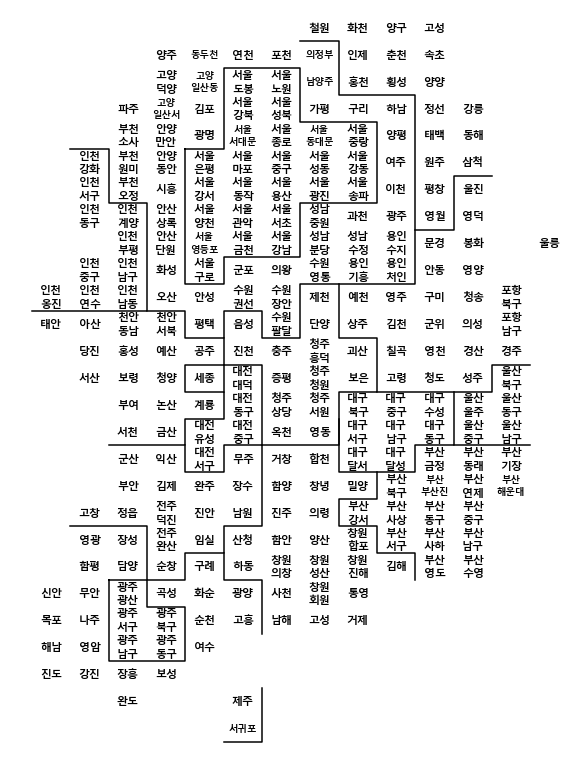

In [37]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

짠, 이렇게 지도가 완성되었습니다. 지역별로 경계선까지 잘 만들어졌네요! 

그러면 여기의 지역에 맞는 데이터가 들어가야겠죠? 그러러면 우선 ID가 맞아야 할테니 인구가 들어있는 변수와 시각화 변수에 모두 적절하게 아이디가 겹치는 것은 없는지, 더 들어간 것은 없는지 확인해볼게요. 이 때는 집합자료형을 사용해서 확인해보려 합니다

In [38]:
# 집합자료형으로 아이디가 겹치는 건 없는 지 확인! 
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

set()

여기에는 겹치는 게 없습니다~! 

In [39]:
# 위와 반대로 해줌 
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

여기에는 겹치는 것이 있네요. 즉, pop에는 더 많은 데이터들이 있다는 것인데요, 이게 draw_korea에 없으니까 시각화될 수 없겠죠. 그래서 이 데이터들을 삭제할 겁니다!

In [40]:
# 삭제할 데이터들을 리스트로 만들어줌 
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

# 삭제할 데이터의 인덱스를 찾아 드랍시킴 
for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

set()


잘 삭제 되었습니다! (집합 자료형이 이렇게 쓰이니까 신기하지 않나요ㅎㅎㅎ) 

그럼 이제는 서로 데이터들을 잘 맞춘 것 같으니, 인구 데이터와 지도 데이터를 서로 합칠게요. 한군데로 합쳐져야 그 데이터를 시각화할 수 있으니까요! 

In [41]:
# ID를 중심으로 merge 하자!
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉,3,11
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원),0,10
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해,4,11
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척,5,11
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초,1,10


잘 합쳐진 것 같습니다. 이제 혜식님의 코드를 사용해서 시각화할 것인데요, 혜식님은 drawKorea()를 사용해서 시각화하는 함수를 만드셨어요. 그 중 일부에 mapdata를 그리도록 했는데, 미리 보면 더 이해가 쉬울 것 같아서 떼와봤습니다.

In [42]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [43]:
mapdata # x와 y를 기준으로 인구수합계 values를 위치시킴 

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48013.0,26264.0,24010.0,30114.0,NaN,NaN,NaN
1,NaN,NaN,NaN,205513.0,98277.0,45907.0,154763.0,438457.0,32720.0,280707.0,81793.0,NaN,NaN,NaN
2,NaN,NaN,NaN,446233.0,292612.0,348220.0,567581.0,662154.0,70076.0,45991.0,27218.0,NaN,NaN,NaN
3,NaN,NaN,430781.000000,300839.0,363443.0,327195.0,450355.0,62448.0,193763.0,211101.0,38718.0,213846.0,NaN,NaN
4,NaN,NaN,283793.333333,252353.0,339484.0,314194.0,152737.0,355069.0,411005.0,111367.0,47070.0,93297.0,NaN,NaN
5,NaN,68010.0,283793.333333,345061.0,491476.0,379892.0,125249.0,299259.0,444168.0,111563.0,337979.0,69599.0,NaN,NaN
6,NaN,510733.0,283793.333333,402888.0,595485.0,400997.0,230241.0,357215.0,657831.0,210359.0,43318.0,51738.0,NaN,NaN
7,NaN,71014.0,330284.000000,375857.0,477739.0,506851.0,447192.0,237909.0,63778.0,327723.0,40073.0,39052.0,NaN,NaN
8,NaN,NaN,549716.000000,314002.0,370613.0,235386.0,567115.0,503830.0,232841.0,347833.0,74702.0,33539.0,NaN,10001.0


In [44]:
# 혜식님 코드: drawKorea()라는 함수를 만들어 준것! 
def drawKorea(targetData, blockedMap, cmapname):  # 여기 주의해서 보기!
    gamma = 0.75
    
    # 시각화 시에 소멸지역이 아닌 곳은 흰색으로 표시되게끔! 
    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

이렇게 함수를 만들어주었습니다. 함수에다가 무엇을 넣어야 하는지도 기억하시구요! 이렇게 반복적으로 사용할 경우에는 함수를 만들어주어서 더 편리하게 사용할 수 있도록 해요. 함수의 유용성에는 이런 곳에 있답니다! 

### 7. 인구 현황 및 인구 소멸 지역 확인하기 

위에서 만든 함수를 사용해서 시각화를 해보겠습니다. 

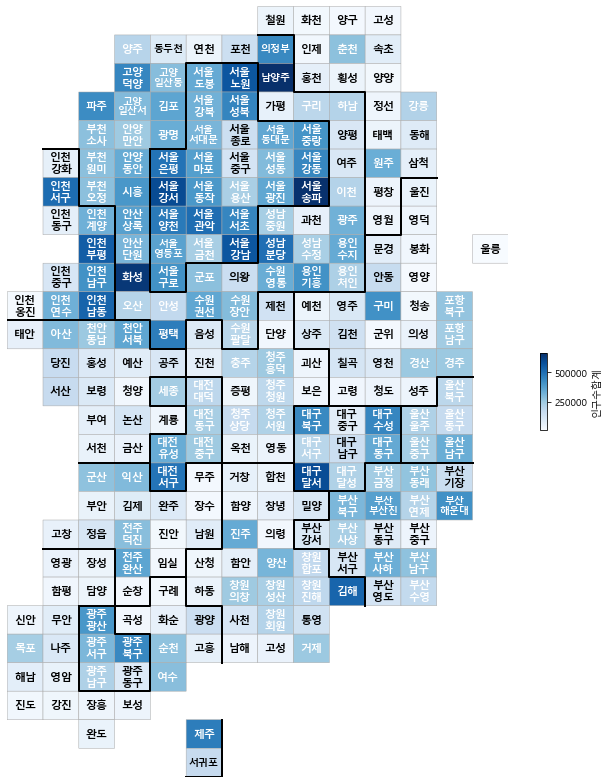

In [45]:
drawKorea('인구수합계',pop,'Blues')

인구수합계를 기준으로 시각화 해봤습니다. 짙은 색이 인구수가 많고 옅은 색이 인구수가 없으니까, 수도권을 제외하면 거의 인구소멸지역 위기에 있는 상태 같네요. 2015년 데이터인데 지금은 얼마나 더 심화되었을까 하는 생각이 듭니다. 도농인구 격차는 날이 갈수록 심해지는 것 같은데요....

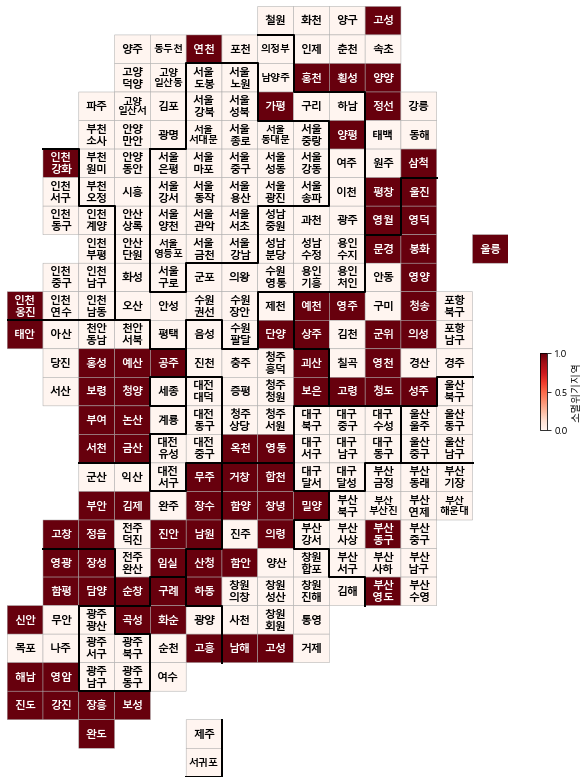

In [46]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역',pop,'Reds')

이게 계산한 인구 소멸 위기 지역입니다. 경남쪽을 제외하고 남쪽은 거의 인구 소멸 위기 지역이네요. 서울권이 아니라면, 광역시들로 인구가 쏠리고 있다는 생각도 듭니다. 

### 8. 인구 현황에서 여성 인구 비율 확인하기 

우선 전체 인구 중에서 여성이 얼마나 되는지 살펴보려고 해요. 사실 자칫하면 (조금 있다가 하는) 20-30대 여성비율을 시각화하는게 가임기 여성 지도와 같이 보일 수 있어서 이 저자의 의도가 무엇인가 봤더니, "여성 인구가 너무 줄어 남녀 비율의 불균형"을 살펴보려고 한다네요. 

그 전에 앞서 만들어 놓은 drawKorea 함수를 살짝 손봐야해요. 후에 여성비를 만들 것인데, 이게 색상 팔레트 문제 때문에 기준을 0으로 하도록 해서 음수가 나올 수 있거든요. 그래서 tmp_max부분을 손봤어요. (근데 어차피 다 검은색으로 나오기 때문에 색은 중요하지 않지만, 데이터를 손 보면 음수가 뜰 수 있어서 오류가 나서 수정한 거에요) 

In [50]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData
    
    # 음수가 생기지 않도록! 
    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

그 다음 여성비를 계산해봅시다! 0을 기준으로 한 거에요!

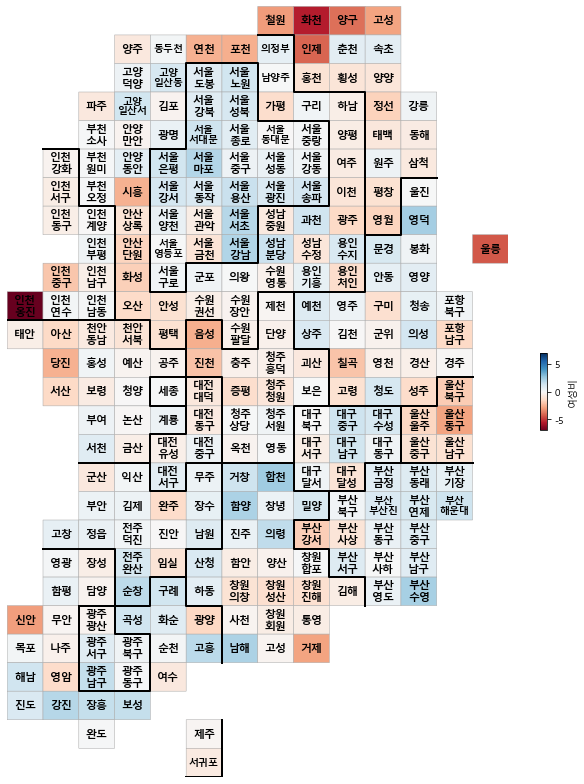

In [51]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

붉은 색을 띠는 것이 여성비가 낮은 곳이라고 생각하면 되겠습니다. 

그럼 이제는 전체 20-30대 인구 중 20-30대 여성으로 데이터를 바꾸어서 시각화해 볼게요. (즉, 남성이 더 많으면 붉은 색이겠죠!) 

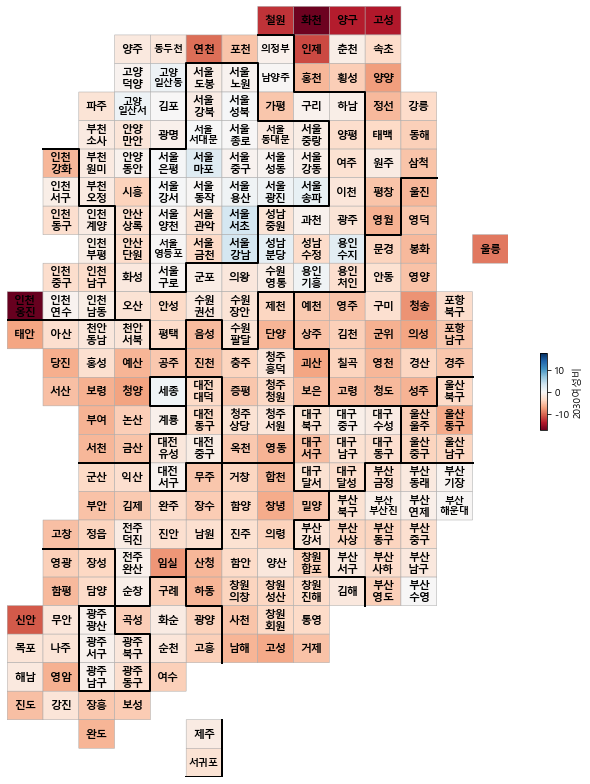

In [52]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

대부분이 여성보다 남성이 더 많네요! 서울은 비슷한 것 같은데, 지방은 거의 20-30대는 남성이 더 많은 것 같습니다. 

### 9. Folium에서 인구 소멸 위기 지역 표현하기 

ㅎㅎㅎ이제 Folium이 더 친근하죠? 인덱스를 folium에서 사용할 ID로 설정해둘게요! (그래야 쉽게 인식한다고 하네요!) 

In [53]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,0,3,11,0.323597,-3.227766
고성(강원),강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,1,0,10,-2.796042,-13.989748
동해,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,0,4,11,-0.554680,-4.133747
삼척,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,1,5,11,-0.651590,-5.033812
속초,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,0,1,10,0.743951,-3.217875


In [54]:
# 필요한 모듈들 임포트 
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

폴리움에다 시각화해봅시다.

In [55]:
geo_path = '05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

FileNotFoundError: [Errno 2] No such file or directory: '05. skorea_municipalities_geo_simple.json'

이렇게 인구수합계를 지도에 담아봤습니다. 이게 멋있긴 한데 Cartogram이 지역까지 나오니까 더 유의미한 것 같아요. 

소멸위기지역까지 시각화해보겠습니다.

In [ ]:
geo_path = '05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

이렇게 소멸위기지역까지 Folium으로 시각화 완료! 

### 공부를 끝내며 

이번 주는 다른게 어려운게 아니라 혜식님의 코드를 이해하는데 상당히 골머리를 앓으셨을 것 같은데요, 잘만 이해하면 두고두고 써먹을 수 있으니까 잘 확인해봅시다. 또한 국가통계포털 KOSIS에서 직접 데이터를 다운받아 이것저것 써먹어보려고 하니까 더 두근두근하죠? 저는 버거지수가 흥미로워서 이런저런 아이디어도 생각해봤는데요, 이를 최신화해보는 것도 재미있을 것 같습니다. 인터넷에서 어떤 사람은 우리나라의 경우 현재 맘스터치까지 추가해야한다고 하더라구요. 여러분만의 버거지수는 뭔지도 생각해보시구요ㅎㅎ 어떻게 업데이트를 하면 좋을 것인지 고민해보는 것도 즐거울 것 같습니다🥰

이제 우리가 다룰 프로젝트는 거의 끝나갑니다. 고지가 보입니다🐶 조금만 더 힘을 내서 공부 끝까지 해봅시다~! 여기까지 해준 것만으로도 여러분은 대단해요👍 그럼 다음 프로젝트로 다시 만나요! 